In [2]:
#Q 1---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
m= data.isnull().sum()
print("missing",m)

missing PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
c=['Embarked','Name','Ticket','Cabin' ]
data.drop(columns=c, inplace=True)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [12]:
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(data[['Sex']])
encoded_data = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Sex']))
data_encoded = pd.concat([data.drop(columns=['Sex']), encoded_data], axis=1)

In [18]:
for column in data_encoded.columns:
    if data_encoded[column].dtype == 'object':
        mode_value = data_encoded[column].mean()
        data_encoded[column] = data_encoded[column].fillna(mode_value)

In [21]:
data_encoded.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  \
0              1         0       3  22.0      1      0   7.2500         0.0   
1              2         1       1  38.0      1      0  71.2833         1.0   
2              3         1       3  26.0      0      0   7.9250         1.0   
3              4         1       1  35.0      1      0  53.1000         1.0   
4              5         0       3  35.0      0      0   8.0500         0.0   
..           ...       ...     ...   ...    ...    ...      ...         ...   
886          887         0       2  27.0      0      0  13.0000         0.0   
887          888         1       1  19.0      0      0  30.0000         1.0   
888          889         0       3   NaN      1      2  23.4500         1.0   
889          890         1       1  26.0      0      0  30.0000         0.0   
890          891         0       3  32.0      0      0   7.7500         0.0   

     Sex_male  
0  

In [26]:
mean_age = data_encoded['Age'].mean()

# Fill missing values in the 'Age' column with the mean age
data_encoded['Age'] = data_encoded['Age'].fillna(mean_age)

m= data_encoded.isnull().sum()
print("missing",m)

missing PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
dtype: int64


In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

X = data_encoded.drop('Survived', axis=1)
y = data_encoded['Survived']

numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex_female', 'Sex_male']

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
       
    ])

# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
single_split_accuracy = accuracy_score(y_test, y_pred)
k = 5
cv_scores = cross_val_score(pipeline, X, y, cv=k, scoring='accuracy')

# Evaluate the model
print("Single Train-Test Split Evaluation:")
print("Accuracy:", single_split_accuracy)

print("\nk-Fold Cross-Validation Evaluation:")
print(f"Mean Accuracy: {cv_scores.mean()}")
print(f"Accuracy for each fold: {cv_scores}")

Single Train-Test Split Evaluation:
Accuracy: 0.7318435754189944

k-Fold Cross-Validation Evaluation:
Mean Accuracy: 0.6970309459544284
Accuracy for each fold: [0.6424581  0.68539326 0.73033708 0.71910112 0.70786517]


In [29]:
#Q  2

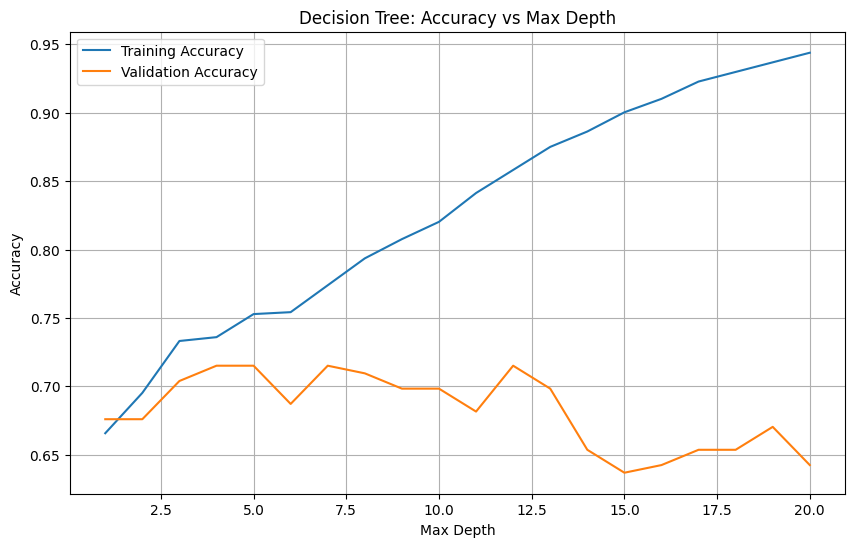

In [30]:
X = data_encoded.drop('Survived', axis=1)
y = data_encoded['Survived']

# Identify numerical and categorical features
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex_female', 'Sex_male']

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)

    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def evaluate_decision_tree(max_depth_range):
    train_accuracies = []
    val_accuracies = []
    
    for max_depth in max_depth_range:
       
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', DecisionTreeClassifier(max_depth=max_depth))
        ])
        
        # Train the model
        pipeline.fit(X_train, y_train)
        
        # Evaluate on training data
        y_train_pred = pipeline.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_accuracies.append(train_accuracy)
    
        y_val_pred = pipeline.predict(X_test)
        val_accuracy = accuracy_score(y_test, y_val_pred)
        val_accuracies.append(val_accuracy)
    
    return train_accuracies, val_accuracies

# Define the range of depths to evaluate
max_depth_range = range(1, 21)

train_accuracies, val_accuracies = evaluate_decision_tree(max_depth_range)

# Plot training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_accuracies, label='Training Accuracy')
plt.plot(max_depth_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Accuracy vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
#Q  3

X = data_encoded.drop('Survived', axis=1)
y = data_encoded['Survived']

# Identify numerical and categorical features
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex_female', 'Sex_male']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Model Evaluation:
Accuracy: 0.7318435754189944
Precision: 0.7708333333333334
Recall: 0.5
F1-Score: 0.6065573770491803


In [33]:
#Q 4
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Accuracy: 0.6145251396648045


NameError: name 'auc' is not defined